In [13]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, BatchNormalization
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
num_classes = [7, 3, 3, 4, 6, 3]

In [8]:
X_train = np.load('data/X_train.npy')
X_val = np.load('data/X_val.npy')
y_train = np.load('data/y_train.npy')
y_val = np.load('data/y_val.npy')

In [9]:
y_train_split = [y_train[:, i] for i in range(6)]
y_val_split   = [y_val[:, i] for i in range(6)]

In [6]:
input_layer = Input(shape=(300, 225, 3))

x = Conv2D(32, (3,3), activation='relu', padding='same')(input_layer)
x = MaxPooling2D((2,2))(x)
x = BatchNormalization()(x)

x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2))(x)
x = BatchNormalization()(x)

x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2))(x)
x = BatchNormalization()(x)

x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.4)(x)

# Create 6 output heads
outputs = [Dense(num, activation='softmax', name=f'attr_{i+1}')(x) for i, num in enumerate(num_classes)]

model = Model(inputs=input_layer, outputs=outputs)
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 300, 225,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 300, 225,  │        896 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 150, 112,  │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 150, 112,  │        128 │ max_pooling2d_3[… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 150, 112,  │     18,496 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 75, 56,    │          0 │ conv2d_4[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 75, 56,    │        256 │ max_pooling2d_4[… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 75, 56,    │     73,856 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 37, 28,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 37, 28,    │        512 │ max_pooling2d_5[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 132608)    │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 256)       │ 33,947,904 │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 256)       │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attr_1 (Dense)      │ (None, 7)         │      1,799 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attr_2 (Dense)      │ (None, 3)         │        771 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attr_3 (Dense)      │ (None, 3)         │        771 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attr_4 (Dense)      │ (None, 4)         │      1,028 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attr_5 (Dense)      │ (None, 6)         │      1,542 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attr_6 (Dense)      │ (None, 3)         │        771 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 34,048,730 (129.89 MB)

 Trainable params: 34,048,282 (129.88 MB)

 Non-trainable params: 448 (1.75 KB)

In [11]:
model.compile(
    optimizer='adam',
    loss=['sparse_categorical_crossentropy'] * 6,
    metrics=['accuracy'] * 6
)


In [12]:
history = model.fit(
    X_train, y_train_split,
    validation_data=(X_val, y_val_split),
    epochs=25,
    batch_size=32
)


Epoch 1/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 245s 2s/step - attr_1_accuracy: 0.4458 - attr_1_loss: 3.2248 - attr_2_accuracy: 0.5044 - attr_2_loss: 2.1591 - attr_3_accuracy: 0.6838 - attr_3_loss: 1.7753 - attr_4_accuracy: 0.4046 - attr_4_loss: 2.4130 - attr_5_accuracy: 0.6314 - attr_5_loss: 2.9292 - attr_6_accuracy: 0.7590 - attr_6_loss: 1.6695 - loss: 14.2006 - val_attr_1_accuracy: 0.2050 - val_attr_1_loss: 6.5683 - val_attr_2_accuracy: 0.4910 - val_attr_2_loss: 1.9216 - val_attr_3_accuracy: 0.3180 - val_attr_3_loss: 4.4935 - val_attr_4_accuracy: 0.3440 - val_attr_4_loss: 2.4917 - val_attr_5_accuracy: 0.2810 - val_attr_5_loss: 6.4243 - val_attr_6_accuracy: 0.5370 - val_attr_6_loss: 1.8314 - val_loss: 23.6240
Epoch 2/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 248s 2s/step - attr_1_accuracy: 0.4808 - attr_1_loss: 1.8093 - attr_2_accuracy: 0.5224 - attr_2_loss: 1.0497 - attr_3_accuracy: 0.7116 - attr_3_loss: 0.9626 - attr_4_accuracy: 0.4114 - attr_4_loss: 1.2832 - attr_5_accuracy: 0.6780 - attr_5_loss: 1

In [14]:
preds = model.predict(X_val)
y_pred = [np.argmax(p, axis=1) for p in preds]
y_true = [y_val[:, i] for i in range(6)]


32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 321ms/step


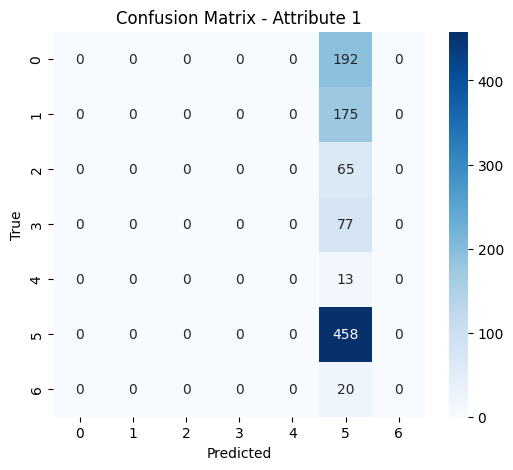

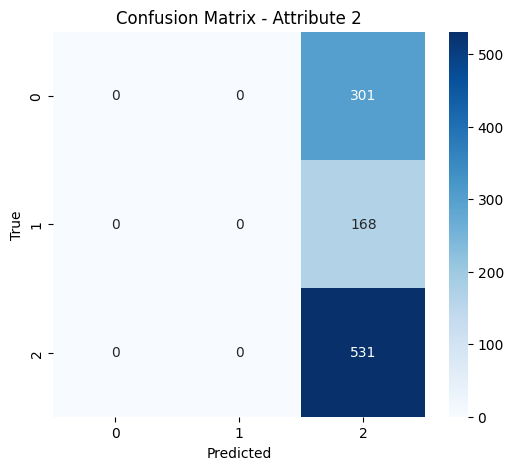

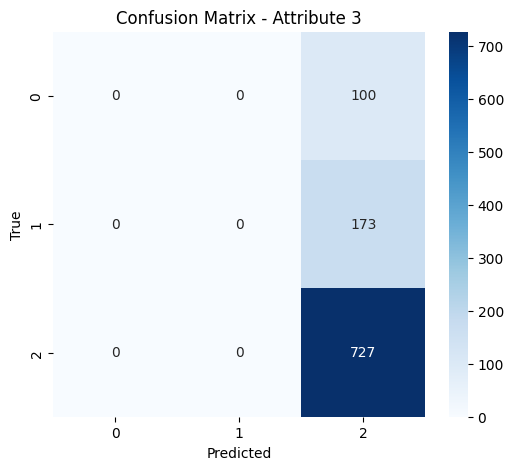

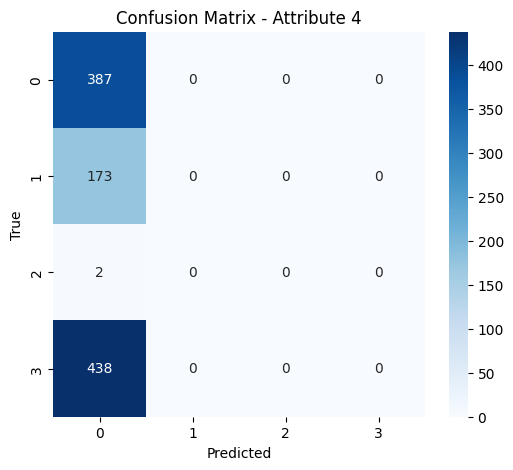

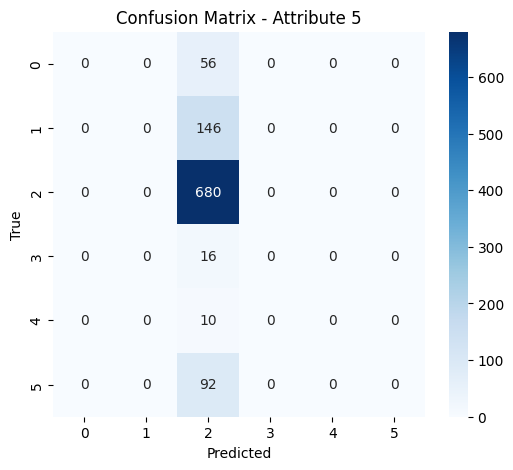

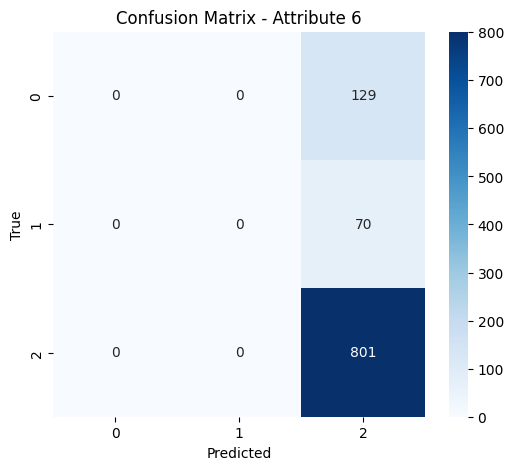

In [15]:


for i in range(6):
    cm = confusion_matrix(y_true[i], y_pred[i])
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - Attribute {i+1}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
